# 8.9 실행하기

## 8.9.1 구현 파일 실행시키기

In [1]:
%run ../chap08/cnn_reg_model.ipynb
%run ../chap05/dataset_flowers.ipynb
%run ../chap06/dataset_office31.ipynb

## 8.9.2 실험용 데이터셋 객체 생성

In [2]:
fd = FlowersDataset([96, 96], [96, 96, 3])
od = Office31Dataset([96, 96], [96, 96, 3])

## 8.9.3 베이스라인 모델의 파라미터 분포 확인

Model flowers_model_1 train started:
     Epoch 2: cost=1.601, accuracy=0.246/0.240 (16/16 secs)
     Epoch 4: cost=1.598, accuracy=0.246/0.250 (15/31 secs)
     Epoch 6: cost=1.598, accuracy=0.246/0.220 (16/47 secs)
     Epoch 8: cost=1.598, accuracy=0.246/0.190 (16/63 secs)
     Epoch 10: cost=1.598, accuracy=0.246/0.230 (15/78 secs)
Model flowers_model_1 train ended in 78 secs:
Model flowers_model_1 test report: accuracy = 0.232, (1 secs)

Model flowers_model_1 Visualization


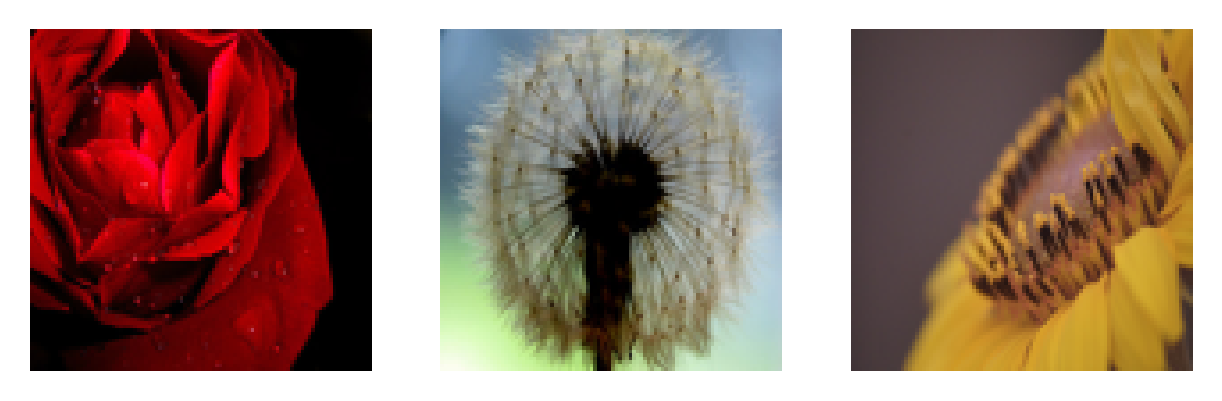

추정확률 분포 [ 0, 0,100, 0, 0] => 추정 rose : 정답 rose => O
추정확률 분포 [ 0,100, 0, 0, 0] => 추정 dandelion : 정답 dandelion => O
추정확률 분포 [ 0, 0, 0,100, 0] => 추정 sunflower : 정답 sunflower => O


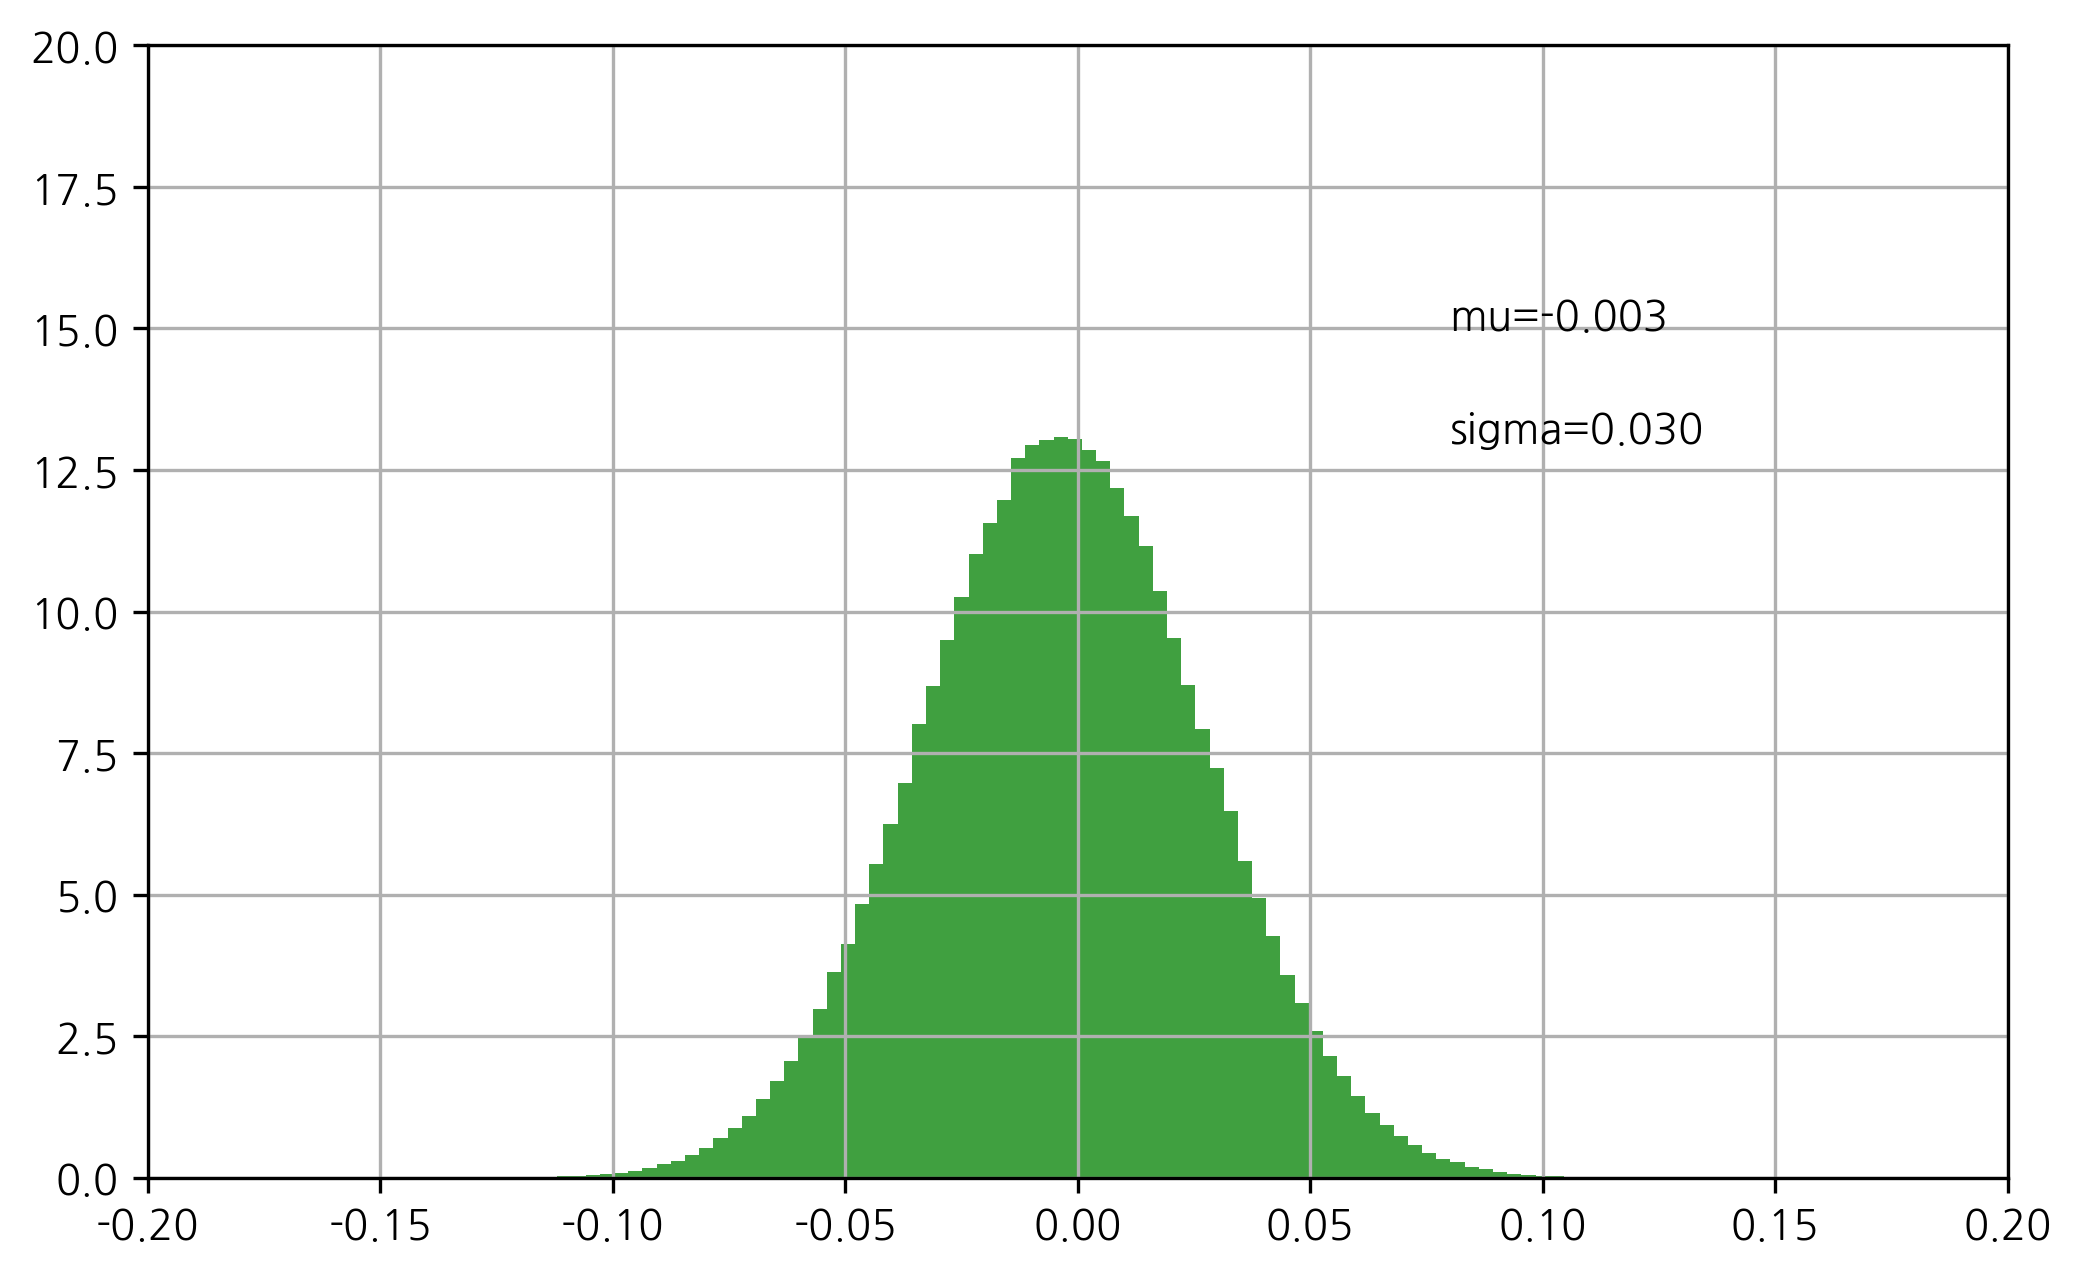

Near 0 parameters =  0.0%(212/829790)


In [5]:
fm1 = CnnRegModel('flowers_model_1', fd, [30,10])
fm1.exec_all(epoch_count=10, report=2, show_params=True)

## 8.9.4 L2 손실의 효과와 파라미터 분포의 변화 확인

Model flowers_model_2 train ended in 329 secs:
Model flowers_model_2 test report: accuracy = 0.232, (0 secs)



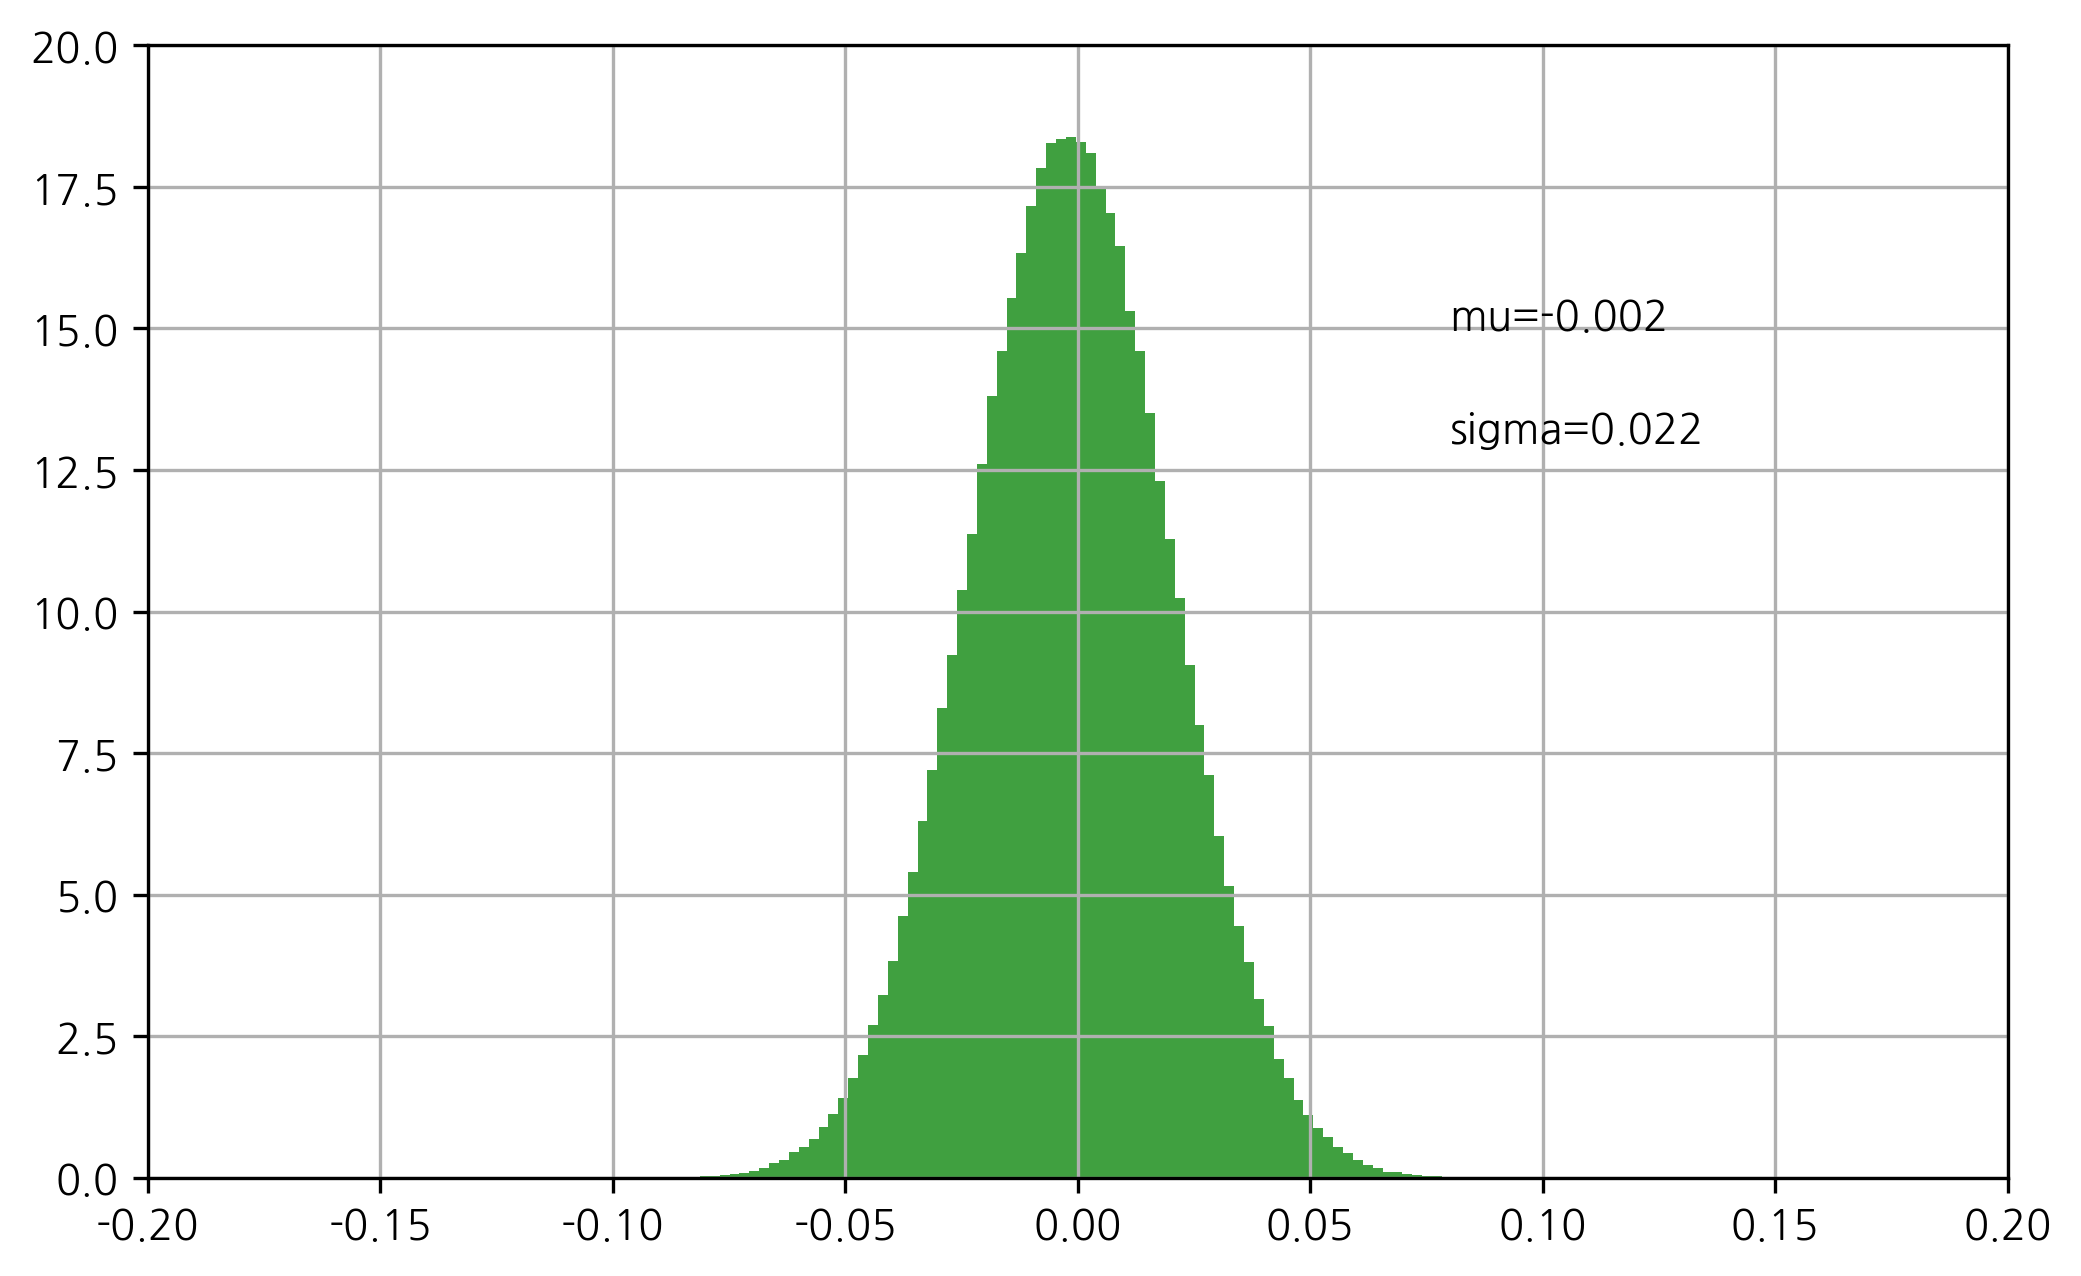

Near 0 parameters =  0.0%(340/829790)


In [6]:
fm2 = CnnRegModel('flowers_model_2', fd, [30,10], l2_decay = 0.1)
fm2.exec_all(epoch_count=10, show_cnt=0, show_params=True)

## 8.9.5 L1 손실의 효과와 파라미터 분포의 변화 확인

Model flowers_model_3 train ended in 343 secs:
Model flowers_model_3 test report: accuracy = 0.232, (0 secs)



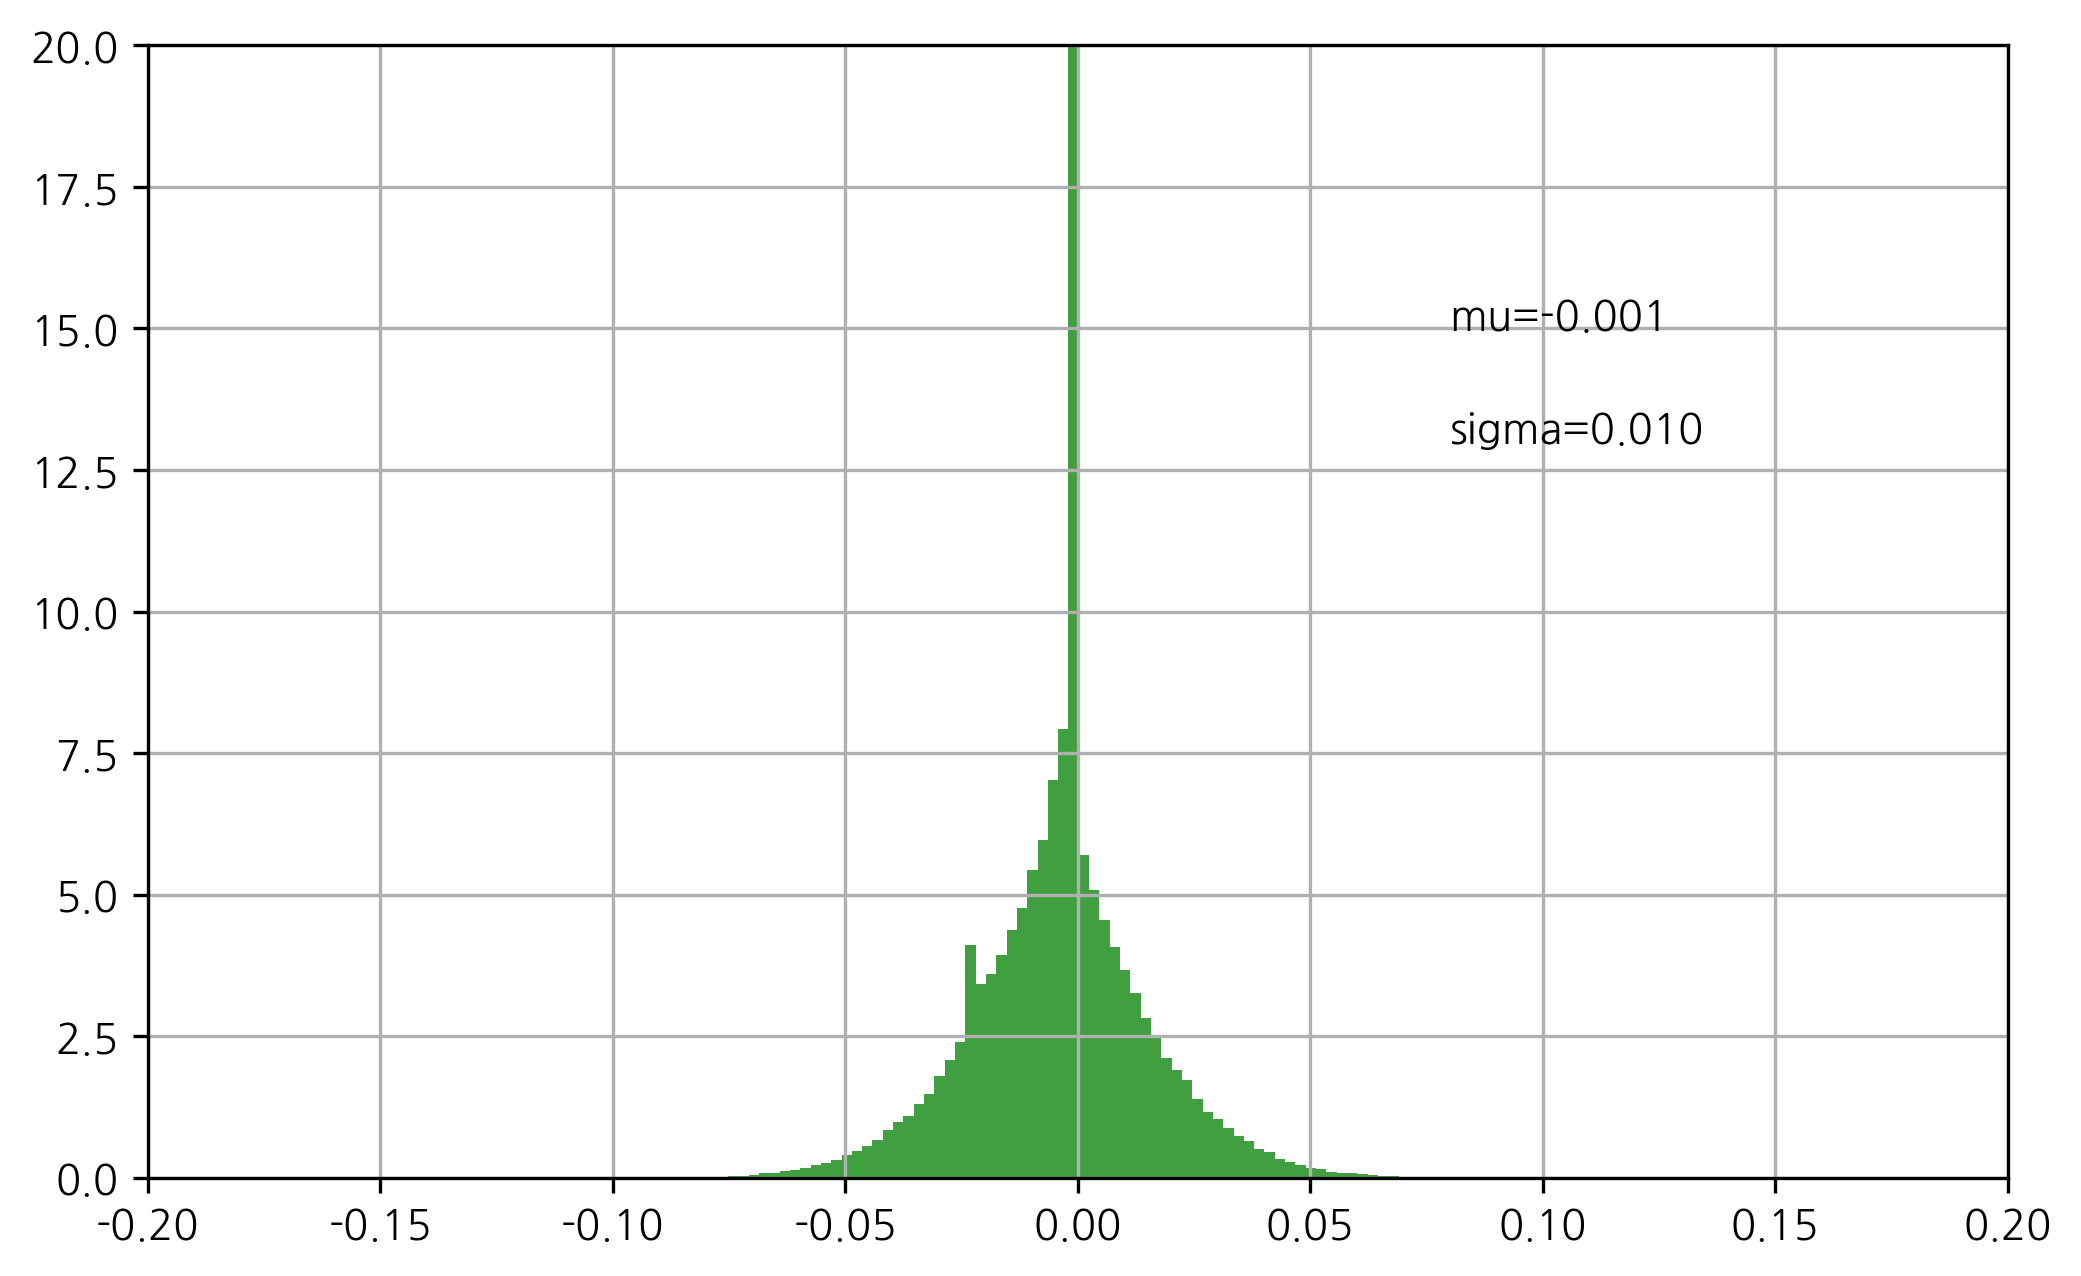

Near 0 parameters = 73.4%(608946/829790)


In [7]:
fm3 = CnnRegModel('flowers_model_3', fd, [30,10], l1_decay=0.01)
fm3.exec_all(epoch_count=10, show_cnt=0, show_params=True)

## 8.9.6 베이스라인 합성곱 신경망의 성능 확인

Model flowers_cnn_1 train started:
     Epoch 2: cost=1.117, accuracy=0.570/0.500 (93/93 secs)
     Epoch 4: cost=0.913, accuracy=0.663/0.670 (92/185 secs)
     Epoch 6: cost=0.790, accuracy=0.700/0.620 (92/277 secs)
     Epoch 8: cost=0.662, accuracy=0.756/0.640 (92/369 secs)
     Epoch 10: cost=0.558, accuracy=0.797/0.620 (92/461 secs)
Model flowers_cnn_1 train ended in 461 secs:
Model flowers_cnn_1 test report: accuracy = 0.641, (2 secs)

Model flowers_cnn_1 Visualization


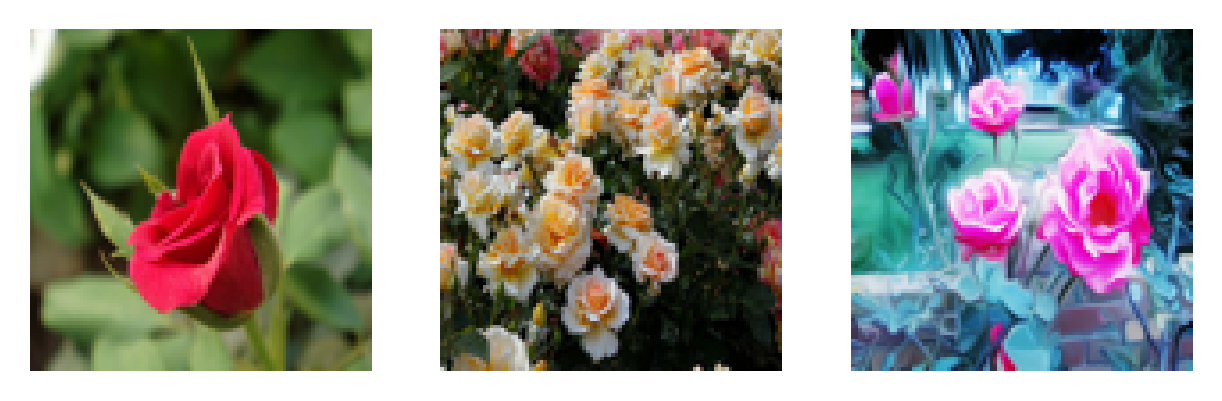

추정확률 분포 [ 0, 0,100, 0, 0] => 추정 rose : 정답 rose => O
추정확률 분포 [ 0, 0,100, 0, 0] => 추정 rose : 정답 rose => O
추정확률 분포 [ 0, 0,100, 0, 0] => 추정 rose : 정답 rose => O


In [8]:
cnn1 = [['conv', {'ksize':3, 'chn':6}],
       ['max', {'stride':2}],
       ['conv', {'ksize':3, 'chn':12}],
       ['max', {'stride':2}],
       ['conv', {'ksize':3, 'chn':24}],
       ['avg', {'stride':3}]]
fcnn1 = CnnRegModel('flowers_cnn_1', fd, cnn1)
fcnn1.exec_all(epoch_count=10, report=2)

## 8.9.7 드롭아웃 기법의 동작과 효과 확인

In [3]:
cnn2 = [['conv', {'ksize':3, 'chn':6}],
       ['max', {'stride':2}],
       ['dropout', {'keep_prob':0.6}],
       ['conv', {'ksize':3, 'chn':12}],
       ['max', {'stride':2}],
       ['dropout', {'keep_prob':0.6}], 
       ['conv', {'ksize':3, 'chn':24}],
       ['avg', {'stride':3}],
       ['dropout', {'keep_prob':0.6}]]
fcnn2 = CnnRegModel('flowers_cnn_2', fd, cnn2)
fcnn2.exec_all(epoch_count=10, report=2, show_cnt=0)

Model flowers_cnn_2 train started:
     Epoch 2: cost=1.217, accuracy=0.505/0.420 (96/96 secs)
     Epoch 4: cost=1.105, accuracy=0.562/0.470 (96/192 secs)
     Epoch 6: cost=1.040, accuracy=0.590/0.420 (95/287 secs)
     Epoch 8: cost=0.947, accuracy=0.635/0.470 (96/383 secs)
     Epoch 10: cost=0.889, accuracy=0.668/0.470 (96/479 secs)
Model flowers_cnn_2 train ended in 479 secs:
Model flowers_cnn_2 test report: accuracy = 0.463, (2 secs)



## 8.9.8 잡음 주입 기법의 동작과 효과 확인

In [5]:
noise_std = 0.01
cnn3 = [['noise', {'type':'normal', 'mean':0,'std':noise_std}], # ratio가 기본값 1이니 모든 데이터에 대해 잡음 주입
       ['conv', {'ksize':3, 'chn':6}],
       ['max', {'stride':2}],
       ['noise', {'type':'normal', 'mean':0,'std':noise_std}],
       ['conv', {'ksize':3, 'chn':12}],
       ['max', {'stride':2}],
       ['noise', {'type':'normal', 'mean':0,'std':noise_std}],
       ['conv', {'ksize':3, 'chn':24}],
       ['avg', {'stride':3}]]
fcnn3 = CnnRegModel('flowers_cnn_3', fd, cnn3)
fcnn3.exec_all(epoch_count=10, report=2, show_cnt=0)

Model flowers_cnn_3 train started:
     Epoch 2: cost=1.174, accuracy=0.527/0.530 (101/101 secs)
     Epoch 4: cost=0.944, accuracy=0.644/0.630 (100/201 secs)
     Epoch 6: cost=0.801, accuracy=0.695/0.580 (100/301 secs)
     Epoch 8: cost=0.680, accuracy=0.746/0.560 (100/401 secs)
     Epoch 10: cost=0.552, accuracy=0.792/0.590 (101/502 secs)
Model flowers_cnn_3 train ended in 502 secs:
Model flowers_cnn_3 test report: accuracy = 0.627, (2 secs)



## 8.9.9 배치 정규화 기법의 동작과 효과 확인

In [3]:
cnn4 = [['batch_normal'],
       ['conv', {'ksize':3, 'chn':6}],
       ['max', {'stride':2}],
       ['batch_normal'],
       ['conv', {'ksize':3, 'chn':12}],
       ['max', {'stride':2}],
       ['batch_normal'], 
       ['conv', {'ksize':3, 'chn':24}],
       ['avg', {'stride':3}]]
fcnn4 = CnnRegModel('flowers_cnn_4', fd, cnn4)
fcnn4.exec_all(epoch_count=10, report=2, show_cnt=0)

Model flowers_cnn_4 train started:
     Epoch 2: cost=1.051, accuracy=0.605/0.240 (106/106 secs)
     Epoch 4: cost=0.882, accuracy=0.662/0.230 (107/213 secs)
     Epoch 6: cost=0.781, accuracy=0.706/0.340 (106/319 secs)
     Epoch 8: cost=0.689, accuracy=0.733/0.460 (106/425 secs)
     Epoch 10: cost=0.636, accuracy=0.754/0.500 (106/531 secs)
Model flowers_cnn_4 train ended in 531 secs:
Model flowers_cnn_4 test report: accuracy = 0.465, (2 secs)



In [5]:
cnn1 = [['conv', {'ksize':3, 'chn':6}],
       ['max', {'stride':2}],
       ['conv', {'ksize':3, 'chn':12}],
       ['max', {'stride':2}],
       ['conv', {'ksize':3, 'chn':24}],
       ['avg', {'stride':3}]]

cnn2 = [['conv', {'ksize':3, 'chn':6}],
       ['max', {'stride':2}],
       ['dropout', {'keep_prob':0.6}],
       ['conv', {'ksize':3, 'chn':12}],
       ['max', {'stride':2}],
       ['dropout', {'keep_prob':0.6}], 
       ['conv', {'ksize':3, 'chn':24}],
       ['avg', {'stride':3}],
       ['dropout', {'keep_prob':0.6}]]

noise_std = 0.01
cnn3 = [['noise', {'type':'normal', 'mean':0,'std':noise_std}], # ratio가 기본값 1이니 모든 데이터에 대해 잡음 주입
       ['conv', {'ksize':3, 'chn':6}],
       ['max', {'stride':2}],
       ['noise', {'type':'normal', 'mean':0,'std':noise_std}],
       ['conv', {'ksize':3, 'chn':12}],
       ['max', {'stride':2}],
       ['noise', {'type':'normal', 'mean':0,'std':noise_std}],
       ['conv', {'ksize':3, 'chn':24}],
       ['avg', {'stride':3}]]

cnn4 = [['batch_normal'],
       ['conv', {'ksize':3, 'chn':6}],
       ['max', {'stride':2}],
       ['batch_normal'],
       ['conv', {'ksize':3, 'chn':12}],
       ['max', {'stride':2}],
       ['batch_normal'], 
       ['conv', {'ksize':3, 'chn':24}],
       ['avg', {'stride':3}]]

## 8.9.10 오피스31 문제에 대한 정규화 기법의 효과 확인

In [6]:
ocnn1 = CnnRegModel('office31_cnn_1', od, cnn1)
ocnn2 = CnnRegModel('office31_cnn_2', od, cnn2)
ocnn3 = CnnRegModel('office31_cnn_3', od, cnn3)
ocnn4 = CnnRegModel('office31_cnn_4', od, cnn4)

ocnn1.exec_all(epoch_count=10, show_cnt=0)
ocnn2.exec_all(epoch_count=10, show_cnt=0)
ocnn3.exec_all(epoch_count=10, show_cnt=0)
ocnn4.exec_all(epoch_count=10, show_cnt=0)

Model office31_cnn_1 train ended in 436 secs:
Model office31_cnn_1 test report: accuracy = 0.882+0.506, (2 secs)

Model office31_cnn_2 train ended in 456 secs:
Model office31_cnn_2 test report: accuracy = 0.234+0.435, (2 secs)

Model office31_cnn_3 train ended in 518 secs:
Model office31_cnn_3 test report: accuracy = 0.874+0.510, (2 secs)

Model office31_cnn_4 train ended in 498 secs:
Model office31_cnn_4 test report: accuracy = 0.955+0.494, (2 secs)

